In [179]:
import numpy as np
np.random.seed(100) # for reproducibility

import tensorflow as tf
tf.random.set_seed(200)

from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [180]:
from os import listdir
from os.path import isfile, join

def breakData(dataTrain, dataLabel, breakPoint):
    totalTime = dataTrain.shape[2]
    lsTrain = []
    lsLabel = []
    bCount = int(totalTime / breakPoint)
#     print("bCount:",bCount)
    for e in range(bCount):
#         print("from:",breakPoint*e," to:",breakPoint*(e+1))
        lsTrain.append(dataTrain[:,:,breakPoint*e:breakPoint*(e+1)][0])
        lsLabel.append(dataLabel[0][0])
    if totalTime % breakPoint > 0:
#         print("from:",(totalTime-breakPoint)," to:",totalTime)
        lsTrain.append(dataTrain[:,:,(totalTime-breakPoint):totalTime][0])
        lsLabel.append(dataLabel[0][0])

#     print("breakdata:",np.array(lsTrain).shape)
    return lsTrain,lsLabel
def viewAllDataFromFolder(dataPath,lablePath,breakPoint):
    onlyfiles = [f for f in listdir(dataPath) if isfile(join(dataPath, f))]
    count = 0
    fileLs = []
    lsBdTrain = None
    lsBdLabel = None
    for fs in onlyfiles:
#         print(fs)
        count = count + 1
        with open(lablePath+"/"+fs, 'rb') as f:
            dataLabel = np.load(f)
        with open(dataPath+"/"+fs, 'rb') as f:
            dataTrain = np.load(f)
#         print("dataTrain.shape:",dataTrain.shape,"  dataLabel.shape:",dataLabel.shape," label value:",dataLabel[0])
#         print(dataTrain[:,:,:121].shape)
        bdTrain,bdLabel = breakData(dataTrain,dataLabel, breakPoint)
        if count == 1:
            lsBdTrain = np.array(bdTrain)
            lsBdLabel = np.array(bdLabel)
        else:
            lsBdTrain = np.append(lsBdTrain,bdTrain,axis=0)
            lsBdLabel = np.append(lsBdLabel,bdLabel,axis=0)
    unique, counts = np.unique(lsBdLabel, return_counts=True)
    print("Num of file:",len(onlyfiles))
    print("Label:",dict(zip(unique, counts)))
    lsBdLabel = lsBdLabel.reshape((lsBdLabel.shape[0],1))
    
    print("Shape lsBdTrain:",lsBdTrain.shape," lsBdLabel:",lsBdLabel.shape)
    return lsBdTrain,lsBdLabel

# Run all

In [201]:
trainData,labelData = viewAllDataFromFolder("data","label",121)

Num of file: 20
Label: {0: 46, 1: 48}
Shape lsBdTrain: (94, 12, 121)  lsBdLabel: (94, 1)


In [196]:
# trainData = np.delete(trainData, [1,2,3,6,9,10,11], 1) # cpu_system,pod_count,system_load,mem_avail,disk_io
# trainData.shape

In [182]:
# def duplicateData(trainData,labelData,numOfSample):
#     print("trainData.shape:",trainData.shape," labelData.shape",labelData.shape)
#     nTrainData = trainData
#     nLabelData = labelData
#     trainDataShape = trainData.shape
#     numOfSample = numOfSample -1
#     for i in range(numOfSample):
#         print(i)
#         for s in range(trainDataShape[0]):
# #             print(trainData[s])
# #             print(trainData[s].shape)
#             nTrainData = np.append(nTrainData,[trainData[s]],axis=0)
#             nLabelData = np.append(nLabelData,[labelData[s]],axis=0)
#     return nTrainData,nLabelData

In [74]:
# nTrainData,nLabelData = duplicateData(trainData,labelData,10)
# nTrainData.shape

trainData.shape: (31, 12, 121)  labelData.shape (31, 1)
0
1
2
3
4
5
6
7
8


(310, 12, 121)

In [198]:
model = keras.Sequential()
model.add(keras.layers.LSTM(80, input_shape=[trainData.shape[1], trainData.shape[2]]))
# model.add(keras.layers.Bidirectional(keras.layers.LSTM(200,return_sequences=True), input_shape=[trainData.shape[1], trainData.shape[2]]))
# model.add(keras.layers.Dense(500))
# model.add(keras.layers.Dense(200))
# model.add(keras.layers.Dense(50))
# model.add(keras.layers.Dense(labelData.shape[1], activation='softmax'))
# model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(labelData.shape[1], activation='sigmoid' ))

# model.compile(loss='mae', optimizer='adam', metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_45 (LSTM)               (None, 80)                64640     
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 81        
Total params: 64,721
Trainable params: 64,721
Non-trainable params: 0
_________________________________________________________________


In [199]:
history = model.fit(
    trainData, labelData,
    epochs=500,
    batch_size=60,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/500
2/2 [==============================] - 0s 216ms/step - loss: 0.7018 - accuracy: 0.4000 - val_loss: 0.6425 - val_accuracy: 0.6842
Epoch 2/500
2/2 [==============================] - 0s 24ms/step - loss: 0.6569 - accuracy: 0.6000 - val_loss: 0.6162 - val_accuracy: 0.7368
Epoch 3/500
2/2 [==============================] - 0s 22ms/step - loss: 0.6554 - accuracy: 0.6533 - val_loss: 0.7253 - val_accuracy: 0.4211
Epoch 4/500
2/2 [==============================] - 0s 20ms/step - loss: 0.6230 - accuracy: 0.6800 - val_loss: 0.7093 - val_accuracy: 0.5263
Epoch 5/500
2/2 [==============================] - 0s 19ms/step - loss: 0.6306 - accuracy: 0.6267 - val_loss: 0.7643 - val_accuracy: 0.3158
Epoch 6/500
2/2 [==============================] - 0s 20ms/step - loss: 0.6286 - accuracy: 0.6267 - val_loss: 0.8192 - val_accuracy: 0.3158
Epoch 7/500
2/2 [==============================] - 0s 21ms/step - loss: 0.6434 - accuracy: 0.6267 - val_loss: 0.8395 - val_accuracy: 0.2632
Epoch 8/500
2/2 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


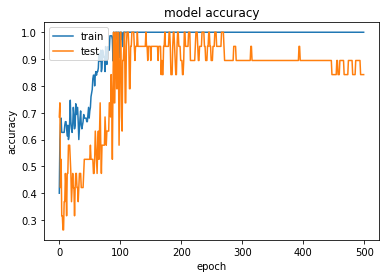

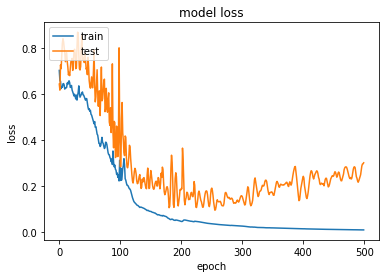

In [200]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [157]:
model.save('cbt.h5')

# testing 2: LSTM with 5 metrics

In [204]:
trainData,labelData = viewAllDataFromFolder("data","label",121)

Num of file: 20
Label: {0: 46, 1: 48}
Shape lsBdTrain: (94, 12, 121)  lsBdLabel: (94, 1)


In [205]:
trainData = np.delete(trainData, [1,2,3,6,9,10,11], 1) # cpu_system,pod_count,system_load,mem_avail,disk_io
trainData.shape

(94, 5, 121)

In [254]:
model = keras.Sequential()
model.add(keras.layers.LSTM(260, input_shape=[trainData.shape[1], trainData.shape[2]]))
# model.add(keras.layers.Bidirectional(keras.layers.LSTM(200,return_sequences=True), input_shape=[trainData.shape[1], trainData.shape[2]]))
# model.add(keras.layers.Dense(500))
# model.add(keras.layers.Dense(200))
model.add(keras.layers.Dense(150))
model.add(keras.layers.Dense(50))
# model.add(keras.layers.Dense(labelData.shape[1], activation='softmax'))
# model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(labelData.shape[1], activation='sigmoid' ))

# model.compile(loss='mae', optimizer='adam', metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_63 (LSTM)               (None, 260)               397280    
_________________________________________________________________
dense_80 (Dense)             (None, 150)               39150     
_________________________________________________________________
dense_81 (Dense)             (None, 50)                7550      
_________________________________________________________________
dense_82 (Dense)             (None, 1)                 51        
Total params: 444,031
Trainable params: 444,031
Non-trainable params: 0
_________________________________________________________________


In [255]:
history = model.fit(
    trainData, labelData,
    epochs=500,
    batch_size=30,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/500
3/3 [==============================] - 0s 159ms/step - loss: 1.1563 - accuracy: 0.4400 - val_loss: 1.4050 - val_accuracy: 0.1579
Epoch 2/500
3/3 [==============================] - 0s 35ms/step - loss: 0.6390 - accuracy: 0.6133 - val_loss: 0.5321 - val_accuracy: 0.8421
Epoch 3/500
3/3 [==============================] - 0s 41ms/step - loss: 0.6423 - accuracy: 0.6533 - val_loss: 0.6944 - val_accuracy: 0.6316
Epoch 4/500
3/3 [==============================] - 0s 36ms/step - loss: 0.5931 - accuracy: 0.6133 - val_loss: 0.8867 - val_accuracy: 0.1579
Epoch 5/500
3/3 [==============================] - 0s 37ms/step - loss: 0.5917 - accuracy: 0.6000 - val_loss: 0.7299 - val_accuracy: 0.2105
Epoch 6/500
3/3 [==============================] - 0s 36ms/step - loss: 0.5403 - accuracy: 0.7333 - val_loss: 0.5739 - val_accuracy: 0.8421
Epoch 7/500
3/3 [==============================] - 0s 35ms/step - loss: 0.5118 - accuracy: 0.7067 - val_loss: 0.5650 - val_accuracy: 0.8421
Epoch 8/500
3/3 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


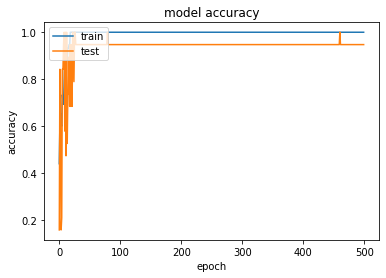

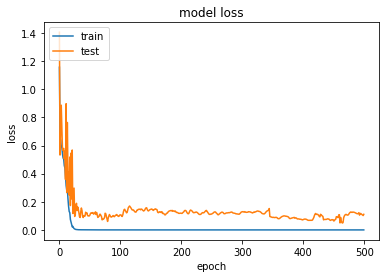

In [256]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [78]:
e = 1
y_pred = model.predict(np.array(trainData))
print(labelData)
y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred

[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


array([[0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

# testing 3: CNN

In [268]:
trainData,labelData = viewAllDataFromFolder("data","label",121)

Num of file: 20
Label: {0: 46, 1: 48}
Shape lsBdTrain: (94, 12, 121)  lsBdLabel: (94, 1)


In [269]:
trainData = np.delete(trainData, [1,2,3,6,9,10,11], 1) # cpu_system,pod_count,system_load,mem_avail,disk_io
trainData.shape
trainData = trainData.reshape(trainData.shape[0],trainData.shape[1],trainData.shape[2],1)

In [373]:
#https://machinelearningmastery.com/how-to-develop-rnn-models-for-human-activity-recognition-time-series-classification/
model = keras.Sequential()
model.add(keras.layers.TimeDistributed(keras.layers.Conv1D(filters=4, kernel_size=3, activation='relu'), input_shape=(trainData.shape[1], trainData.shape[2], 1)))
model.add(keras.layers.TimeDistributed(keras.layers.Conv1D(filters=4, kernel_size=3, activation='relu')))
model.add(keras.layers.TimeDistributed(keras.layers.Dropout(0.5)))
model.add(keras.layers.TimeDistributed(keras.layers.MaxPooling1D(pool_size=2)))
model.add(keras.layers.TimeDistributed(keras.layers.Flatten()))
model.add(keras.layers.LSTM(50))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(30, activation='relu'))
model.add(keras.layers.Dense(labelData.shape[1], activation='sigmoid' ))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_115"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_222 (TimeDi (None, 5, 119, 4)         16        
_________________________________________________________________
time_distributed_223 (TimeDi (None, 5, 117, 4)         52        
_________________________________________________________________
time_distributed_224 (TimeDi (None, 5, 117, 4)         0         
_________________________________________________________________
time_distributed_225 (TimeDi (None, 5, 58, 4)          0         
_________________________________________________________________
time_distributed_226 (TimeDi (None, 5, 232)            0         
_________________________________________________________________
lstm_111 (LSTM)              (None, 50)                56600     
_________________________________________________________________
dropout_93 (Dropout)         (None, 50)             

In [374]:
history = model.fit(
    trainData, labelData,
    epochs=500,
    batch_size=32,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/500
3/3 [==============================] - 0s 163ms/step - loss: 0.7590 - accuracy: 0.4533 - val_loss: 0.6724 - val_accuracy: 0.6842
Epoch 2/500
3/3 [==============================] - 0s 18ms/step - loss: 0.7318 - accuracy: 0.4267 - val_loss: 0.6938 - val_accuracy: 0.4737
Epoch 3/500
3/3 [==============================] - 0s 16ms/step - loss: 0.7178 - accuracy: 0.4533 - val_loss: 0.7458 - val_accuracy: 0.2632
Epoch 4/500
3/3 [==============================] - 0s 17ms/step - loss: 0.7003 - accuracy: 0.4933 - val_loss: 0.7807 - val_accuracy: 0.2105
Epoch 5/500
3/3 [==============================] - 0s 16ms/step - loss: 0.7012 - accuracy: 0.5333 - val_loss: 0.8350 - val_accuracy: 0.2105
Epoch 6/500
3/3 [==============================] - 0s 17ms/step - loss: 0.7154 - accuracy: 0.5067 - val_loss: 0.8930 - val_accuracy: 0.1579
Epoch 7/500
3/3 [==============================] - 0s 18ms/step - loss: 0.7145 - accuracy: 0.5333 - val_loss: 0.9190 - val_accuracy: 0.1579
Epoch 8/500
3/3 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


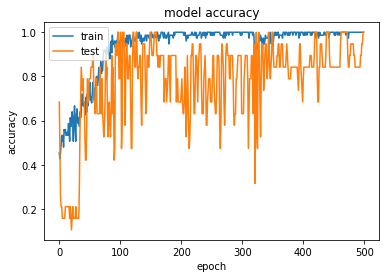

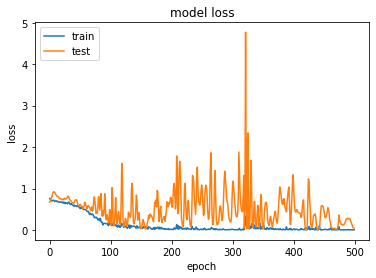

In [376]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [377]:
model.save('lstm-cnn.h5')

In [281]:
e = 1
y_pred = model.predict(np.array(trainData))
print(labelData)
y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
    